In [1]:
data=open('Alice-in-wonderland.txt','r')
raw=data.readlines()
story=raw[127:5405]
story=story[39:]

In [2]:
import re
r1=re.findall(r"\n\n[ A-Z]+\n",''.join(story))
# print(r1)
character_entry_order=list()
for ele in r1:
    dat=ele.strip(" \n")
    if(dat.startswith("SCENE") or dat.startswith("ACT")):
        pass
    else:
        character_entry_order.append(dat)
unique_characters=list(set(character_entry_order))

In [3]:
unique_characters

['GRYPHON',
 'CURTAIN',
 'BOTH QUEENS',
 'JURORS',
 'OTHERS',
 'DEE',
 'FROG',
 'CATERPILLAR',
 'QUEEN OF HEARTS',
 'ALICE',
 'KING',
 'QUEEN',
 'MOCK TURTLE',
 'WHITE RABBIT',
 'EVERYBODY',
 'DUM',
 'ONE JUROR',
 'DORMOUSE',
 'DUCHESS',
 'ALL THE GARDENERS',
 'KNAVE',
 'RED QUEEN',
 'HATTER',
 'CAT',
 'MARCH HARE',
 'RABBIT',
 'CARROLL',
 'JABBERWOCKY',
 'HUMPTY DUMPTY',
 'COURT',
 'WHITE QUEEN',
 'JURY']

In [4]:
unique_characters_processed=list()
for ele in unique_characters:
    unique_characters_processed.append(ele.lower())

In [5]:
story_processed=list()
for ele in story:
    story_processed.append(ele.strip("\n").lower())
# story_processed=re.sub(r"\[[^\]]*\]",r'__',''.join(story_processed))
print(story_processed)

['act i', '', '', 'scene one', '', "_alice's home. lewis carroll is discovered, playing chess. golden-haired", 'alice, in a little blue dress, a black kitten in her arms, stands watching', 'him._', '', '', 'alice', '', "that's a funny game, uncle. what did you do then?", '', '', 'carroll', '', 'a red pawn took a white pawn; this way. you see, alice, the chessboard is', 'divided into sixty-four squares, red and white, and the white army tries', "to win and the red army tries to win. it's like a battle!", '', '', 'alice', '', 'with soldiers?', '', '', 'carroll', '', "yes, here are the kings and queens they are fighting for. that's the red", "queen and here's the white queen.", '', '', 'alice', '', 'how funny they look!', '', '', 'carroll', '', 'see the crowns on their heads, and look at their big feet.', '', '', 'alice', '', "it's a foot apiece, that's what it is! do they hump along like this?", '', '', 'carroll', '', "here! you're spoiling the game. i must keep them all in their right",

In [6]:
expression='|'.join(unique_characters_processed)
expression='('+expression+')+'

In [7]:
data=re.findall(expression,' '.join(story_processed))

In [41]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 

def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
 
text_data = [data]
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

In [42]:
for  i in range(31):
    data_matrix.iloc[i,i]=0
data_matrix=data_matrix.drop(index=["curtain","both queens"],columns=["curtain","both queens"])

In [43]:
data_matrix

,white rabbit,rabbit,court,caterpillar,red queen,queen,frog,others,jurors,humpty dumpty,...,knave,white queen,king,hatter,jury,cat,mock turtle,all the gardeners,carroll,queen of hearts
white rabbit,0.0,3.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,1.0,0.0,8.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0
rabbit,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
court,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
caterpillar,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
red queen,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
queen,3.0,2.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,0.0,...,1.0,0.0,10.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0
frog,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jurors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
humpty dumpty,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#pre-processing the matrix
edge_list=list()
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        if(data_matrix.iloc[i,j]>0 and i!=j):
            edge_list.append((data_matrix.columns[i],data_matrix.columns[j],{"weight":data_matrix.iloc[i,j]}))
            
# edge_list=list(set(edge_list)) 
edge_list

[('white rabbit', 'rabbit', {'weight': 3.0}),
 ('white rabbit', 'court', {'weight': 1.0}),
 ('white rabbit', 'queen', {'weight': 3.0}),
 ('white rabbit', 'frog', {'weight': 1.0}),
 ('white rabbit', 'dee', {'weight': 1.0}),
 ('white rabbit', 'alice', {'weight': 9.0}),
 ('white rabbit', 'duchess', {'weight': 3.0}),
 ('white rabbit', 'knave', {'weight': 1.0}),
 ('white rabbit', 'king', {'weight': 8.0}),
 ('white rabbit', 'hatter', {'weight': 1.0}),
 ('white rabbit', 'jury', {'weight': 3.0}),
 ('white rabbit', 'mock turtle', {'weight': 1.0}),
 ('rabbit', 'red queen', {'weight': 1.0}),
 ('rabbit', 'queen', {'weight': 1.0}),
 ('rabbit', 'alice', {'weight': 6.0}),
 ('rabbit', 'king', {'weight': 1.0}),
 ('rabbit', 'hatter', {'weight': 1.0}),
 ('rabbit', 'carroll', {'weight': 1.0}),
 ('court', 'white rabbit', {'weight': 3.0}),
 ('court', 'queen', {'weight': 1.0}),
 ('court', 'dormouse', {'weight': 1.0}),
 ('court', 'alice', {'weight': 1.0}),
 ('court', 'duchess', {'weight': 2.0}),
 ('court', 'k

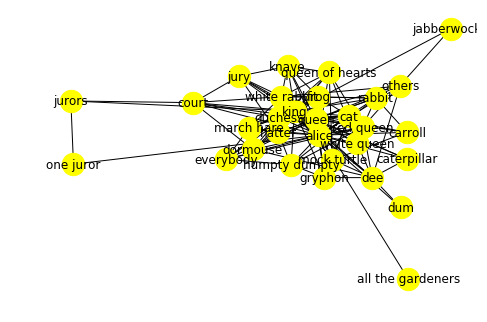

In [45]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, node_size=500, node_color='yellow', with_labels=True)

#for gephi
nx.write_gexf(G,"test.gexf")

In [46]:
G.degree('alice')

27

In [47]:
list(G.edges(data=True))

[('white rabbit', 'rabbit', {'weight': 3.0}),
 ('white rabbit', 'court', {'weight': 3.0}),
 ('white rabbit', 'queen', {'weight': 3.0}),
 ('white rabbit', 'frog', {'weight': 1.0}),
 ('white rabbit', 'dee', {'weight': 1.0}),
 ('white rabbit', 'alice', {'weight': 9.0}),
 ('white rabbit', 'duchess', {'weight': 5.0}),
 ('white rabbit', 'knave', {'weight': 1.0}),
 ('white rabbit', 'king', {'weight': 7.0}),
 ('white rabbit', 'hatter', {'weight': 1.0}),
 ('white rabbit', 'jury', {'weight': 3.0}),
 ('white rabbit', 'mock turtle', {'weight': 1.0}),
 ('white rabbit', 'others', {'weight': 1.0}),
 ('white rabbit', 'march hare', {'weight': 3.0}),
 ('white rabbit', 'queen of hearts', {'weight': 1.0}),
 ('rabbit', 'red queen', {'weight': 1.0}),
 ('rabbit', 'queen', {'weight': 2.0}),
 ('rabbit', 'alice', {'weight': 4.0}),
 ('rabbit', 'king', {'weight': 1.0}),
 ('rabbit', 'hatter', {'weight': 1.0}),
 ('rabbit', 'carroll', {'weight': 1.0}),
 ('rabbit', 'frog', {'weight': 1.0}),
 ('rabbit', 'humpty dumpty

In [48]:
s='\n The graph details: '
print (s)


a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)

deg=nx.degree(G)

#Converting degree view into list
deg1=list(deg)

#sorting the list based on degree
deg1.sort(key=lambda x:x[1])

a= deg1[0]
s='\n The min degree: ' +repr(a)
print (s)

a = deg1[-1]
s='\n The max degree: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)


 The graph details: 

 The no of nodes: 30

 The no of edges: 132

 The min degree: ('all the gardeners', 1)

 The max degree: ('alice', 27)

 The no of edges: 132


In [49]:
from operator import itemgetter

In [50]:
#Degree Centrality
degc = nx.degree_centrality(G)
# let's list the scores
x=sorted(degc.items(), key=itemgetter(1), reverse=True)
# print(x)
x

[('alice', 0.9310344827586207),
 ('king', 0.8620689655172413),
 ('queen', 0.6551724137931034),
 ('white rabbit', 0.5172413793103449),
 ('duchess', 0.41379310344827586),
 ('dee', 0.3793103448275862),
 ('frog', 0.3448275862068966),
 ('hatter', 0.3448275862068966),
 ('red queen', 0.3448275862068966),
 ('rabbit', 0.3103448275862069),
 ('dormouse', 0.3103448275862069),
 ('queen of hearts', 0.3103448275862069),
 ('court', 0.27586206896551724),
 ('mock turtle', 0.27586206896551724),
 ('cat', 0.27586206896551724),
 ('march hare', 0.27586206896551724),
 ('knave', 0.24137931034482757),
 ('jury', 0.24137931034482757),
 ('everybody', 0.24137931034482757),
 ('white queen', 0.24137931034482757),
 ('humpty dumpty', 0.24137931034482757),
 ('gryphon', 0.24137931034482757),
 ('carroll', 0.1724137931034483),
 ('others', 0.1724137931034483),
 ('caterpillar', 0.13793103448275862),
 ('jurors', 0.10344827586206896),
 ('jabberwocky', 0.06896551724137931),
 ('dum', 0.06896551724137931),
 ('one juror', 0.068965

In [51]:
#Betweeness Centrality
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('alice', 0.3012334818985065),
 ('king', 0.20691903198060832),
 ('queen', 0.07039447963093284),
 ('white rabbit', 0.03133454531237782),
 ('dee', 0.029337712096332787),
 ('red queen', 0.021725701774962858),
 ('duchess', 0.016386152162014233),
 ('court', 0.010659551176792558),
 ('hatter', 0.009410430839002268),
 ('queen of hearts', 0.00815153647665963),
 ('frog', 0.006944444444444445),
 ('rabbit', 0.006738212526389865),
 ('mock turtle', 0.006486042692939243),
 ('dormouse', 0.005554578153100321),
 ('cat', 0.0048440065681445),
 ('gryphon', 0.003786457111580264),
 ('humpty dumpty', 0.003735632183908046),
 ('everybody', 0.003410157166314802),
 ('jurors', 0.003284072249589491),
 ('march hare', 0.0029478458049886627),
 ('white queen', 0.002593048713738369),
 ('one juror', 0.0025041050903119866),
 ('knave', 0.0017857142857142859),
 ('jury', 0.0013136288998357964),
 ('carroll', 0.0010262725779967158),
 ('others', 0.0007662835249042146),
 ('caterpillar', 0.0002736726874657909),
 ('jabberwocky', 

In [52]:
#Closness Centrality
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('alice', 0.9354838709677419),
 ('king', 0.8787878787878788),
 ('queen', 0.7435897435897436),
 ('white rabbit', 0.6744186046511628),
 ('duchess', 0.6304347826086957),
 ('dee', 0.6170212765957447),
 ('frog', 0.6041666666666666),
 ('hatter', 0.6041666666666666),
 ('red queen', 0.6041666666666666),
 ('rabbit', 0.5918367346938775),
 ('dormouse', 0.5918367346938775),
 ('queen of hearts', 0.5918367346938775),
 ('court', 0.58),
 ('mock turtle', 0.58),
 ('cat', 0.58),
 ('march hare', 0.58),
 ('knave', 0.5686274509803921),
 ('jury', 0.5686274509803921),
 ('everybody', 0.5686274509803921),
 ('white queen', 0.5686274509803921),
 ('humpty dumpty', 0.5686274509803921),
 ('gryphon', 0.5686274509803921),
 ('carroll', 0.5471698113207547),
 ('caterpillar', 0.5370370370370371),
 ('others', 0.5272727272727272),
 ('one juror', 0.5087719298245614),
 ('jurors', 0.5),
 ('dum', 0.5),
 ('all the gardeners', 0.4915254237288136),
 ('jabberwocky', 0.48333333333333334)]

In [53]:
#Eigenvector Centrality
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('alice', 0.37488654356320583),
 ('king', 0.3643278369995502),
 ('queen', 0.3032101565888754),
 ('white rabbit', 0.2632250885533974),
 ('duchess', 0.22255656718537625),
 ('frog', 0.20207018933190693),
 ('hatter', 0.19546695278589737),
 ('dormouse', 0.18416474696920737),
 ('rabbit', 0.1808824377785527),
 ('dee', 0.17540302787614637),
 ('queen of hearts', 0.17407285950807608),
 ('red queen', 0.17401945727068283),
 ('march hare', 0.1661231578580984),
 ('court', 0.16275554205052734),
 ('cat', 0.16200061763993578),
 ('knave', 0.15608940466363222),
 ('jury', 0.15468560800949277),
 ('mock turtle', 0.1506245405421467),
 ('everybody', 0.1478317147901843),
 ('white queen', 0.1468628744840982),
 ('gryphon', 0.14148524920083425),
 ('humpty dumpty', 0.1341972263738121),
 ('carroll', 0.11677584229825397),
 ('others', 0.11383070602928673),
 ('caterpillar', 0.10350788191366943),
 ('jurors', 0.0478527522810205),
 ('dum', 0.0467712835958975),
 ('jabberwocky', 0.04575634386832423),
 ('one juror', 0.0359

In [54]:
import seaborn as sns
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,eigenvector
alice,0.931034,0.301233,0.935484,0.374887
all the gardeners,0.034483,0.000000,0.491525,0.031863
carroll,0.172414,0.001026,0.547170,0.116776
cat,0.275862,0.004844,0.580000,0.162001
caterpillar,0.137931,0.000274,0.537037,0.103508
court,0.275862,0.010660,0.580000,0.162756
dee,0.379310,0.029338,0.617021,0.175403
dormouse,0.310345,0.005555,0.591837,0.184165
duchess,0.413793,0.016386,0.630435,0.222557
dum,0.068966,0.000000,0.500000,0.046771


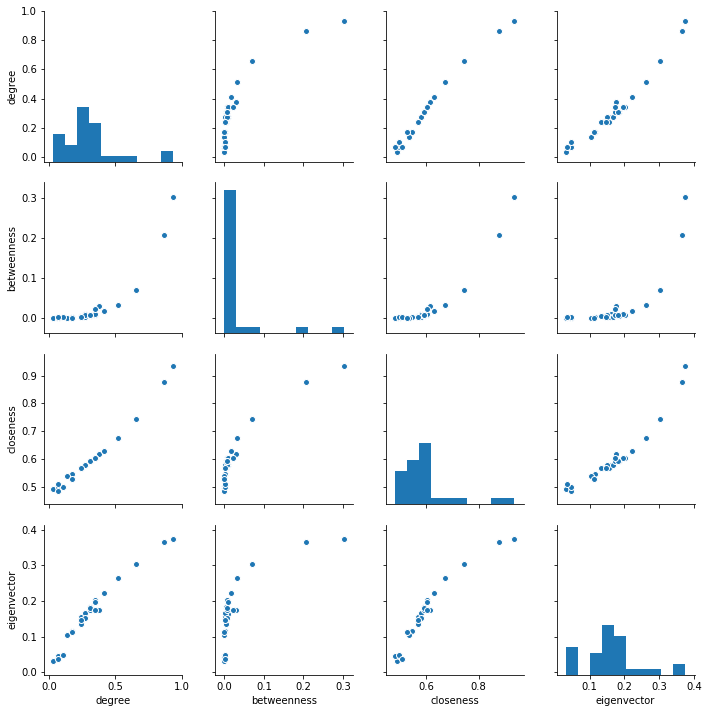

In [55]:
sns.pairplot(centrality)

Edge analysis

In [56]:
ebc=nx.edge_betweenness_centrality(G, normalized=True, weight=None)
ebl=sorted(ebc.items(),
       key=lambda i: i[1],
       reverse=True)[:5]
s='\n Top 5 edge betweenness centrality   :\n'
print (s)
for item in ebl:
    s= repr(item) + ','
    print (s)


 Top 5 edge betweenness centrality   :

(('alice', 'all the gardeners'), 0.06666666666666667),
(('alice', 'one juror'), 0.06363984674329502),
(('king', 'jurors'), 0.05287356321839081),
(('alice', 'dum'), 0.052298850574712646),
(('king', 'jabberwocky'), 0.05124521072796935),


In [57]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:

[('alice', 0.25628749698010855), ('king', 0.08374250860402656), ('queen', 0.05286791123868525), ('hatter', 0.042277117087879304), ('duchess', 0.04226676989678905), ('red queen', 0.03977750591038459), ('mock turtle', 0.03862645881785772), ('white queen', 0.036157217209288384), ('white rabbit', 0.03566377625710846), ('march hare', 0.03280485378179534), ('dee', 0.03104837872951323), ('gryphon', 0.028815340377178405), ('frog', 0.027418762475596145), ('cat', 0.026086381216029568), ('dormouse', 0.024210329929253396), ('humpty dumpty', 0.02087852210415923), ('knave', 0.018712050297653868), ('dum', 0.018624912184699506), ('court', 0.01613810156678931), ('jury', 0.016006941475224364), ('queen of hearts', 0.01504364170784497), ('carroll', 0.014990964925673747), ('rabbit', 0.014900449821077176), ('everybody', 0.012586186986562305), ('caterpillar', 0.012492955699301322), ('others', 0.0108022457003982), ('jurors', 0.010334115140988314), ('one juror', 0.008531405423341479), ('jab

# Ego network of top 5 character based on page rank centrality

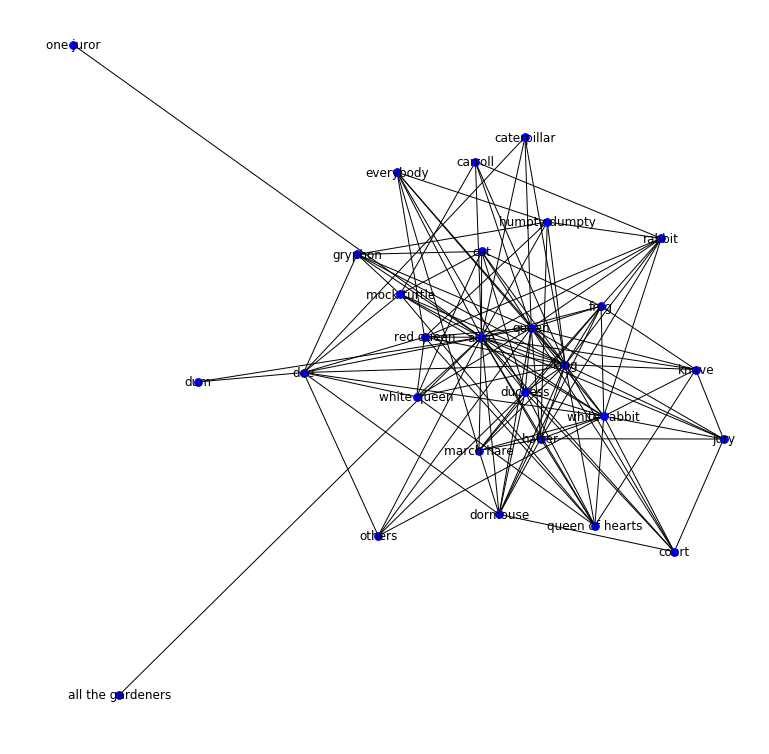

In [80]:
s='alice'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=60,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')

plt.savefig('alice.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

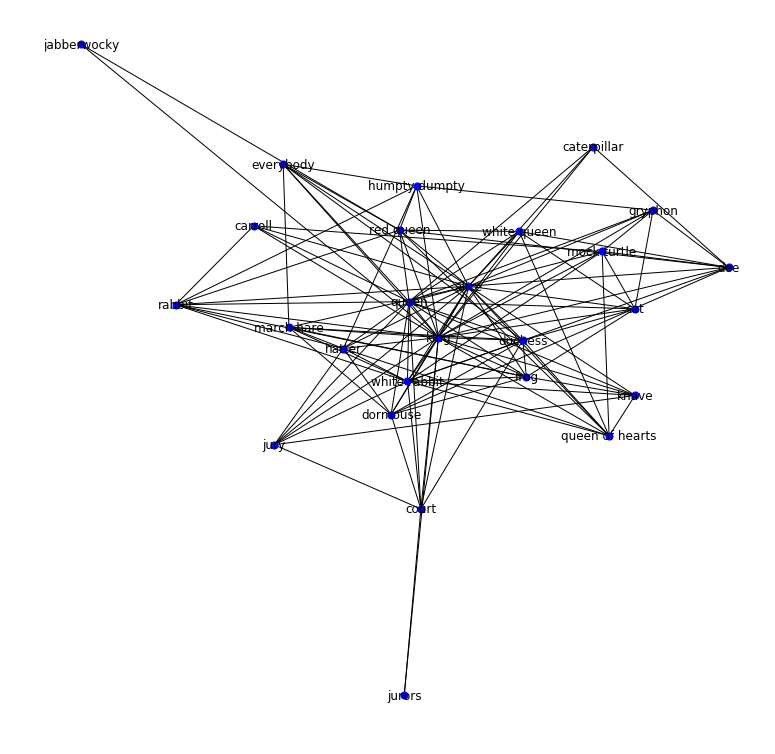

In [81]:
s='king'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('king.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

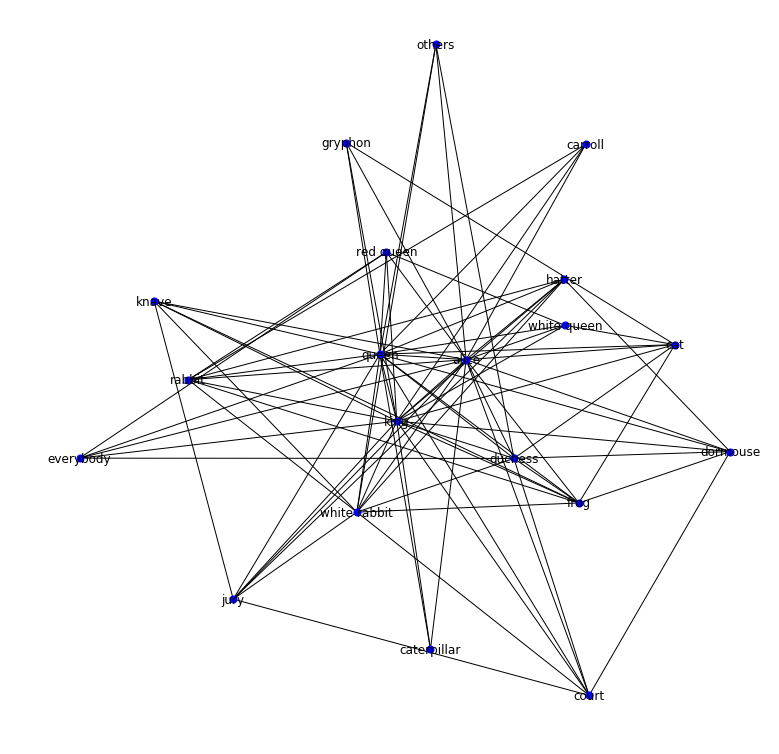

In [82]:
s='queen'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('queen.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

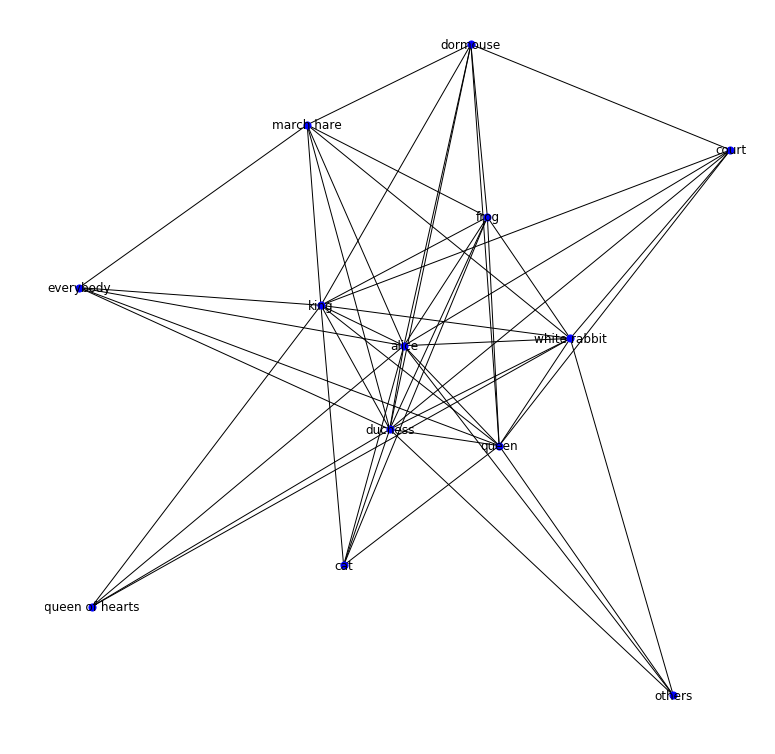

In [96]:
s='duchess'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('duchess.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

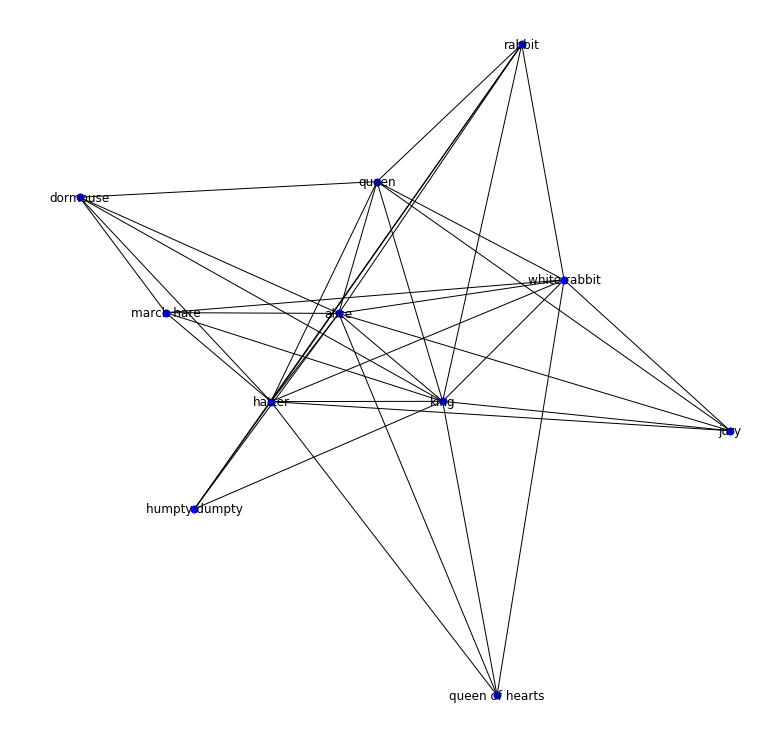

In [83]:
s='hatter'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('hatter.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

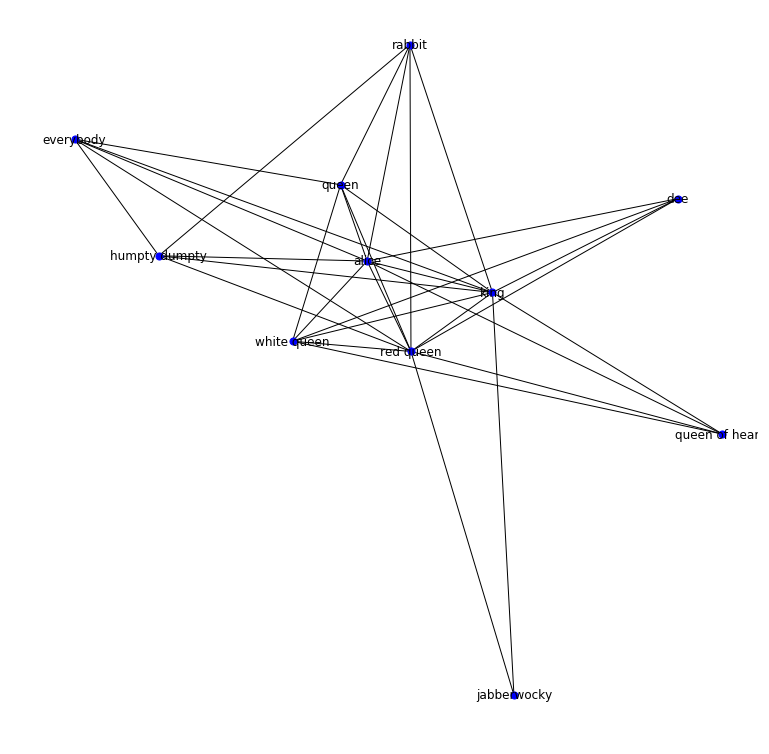

In [94]:
s='red queen'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
plt.figure(figsize=(10,10))
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('hatter.png')
plt.show()
#nx.write_gml(hub_ego,"egonw_medici.gml")

In [63]:
# diameter
d=nx.diameter(G)
print("Diameter",end=' ')
print(d)

#aveerage path length
aspl=nx.average_shortest_path_length(G)
print("Average Shortest Path Length",end=' ')
print(aspl)

Diameter 3
Average Shortest Path Length 1.7126436781609196


## Density

In [64]:
nx.density(G)

0.30344827586206896

<h3>Degree Distribution

Degree sequence
[27, 25, 19, 15, 12, 11, 10, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 5, 5, 4, 3, 2, 2, 2, 1]
Average Degree:	8.8


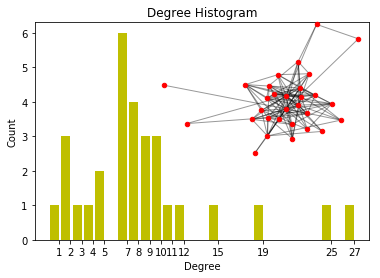

In [65]:
# degree distribution

import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
print ("Degree sequence")
print(degree_sequence)
print("Average Degree:",end="\t")
print(sum(degree_sequence)/len(degree_sequence))
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='y')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

(0.9, 10001)

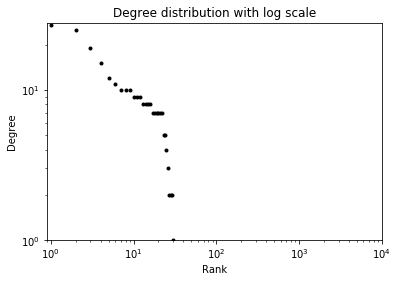

In [66]:
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)


<h3>Components

Just 1 big component


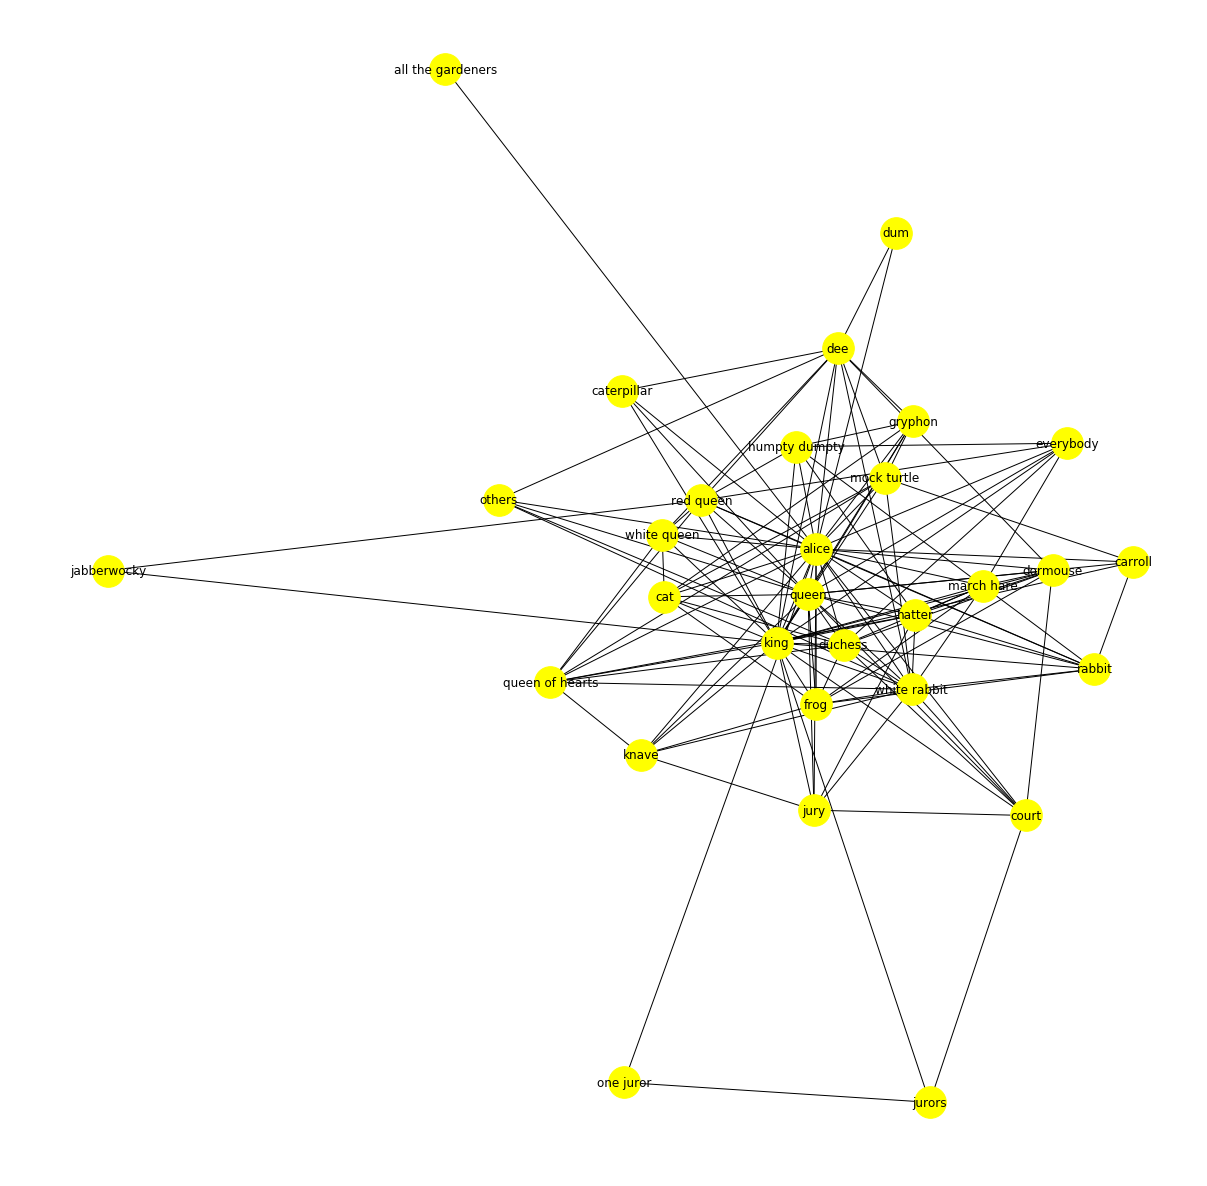

In [97]:
gc = max(nx.connected_component_subgraphs(G), key=len)
# gc
plt.figure(figsize=(16,16))
nx.draw(gc, node_size=1000, node_color='yellow', with_labels=True)
# nx.draw(G, node_size=500, node_color='yellow', with_labels=True)

print("Just 1 big component")

<h3> Assortattivity

In [68]:
# Degree assortativity in the graph
r=nx.degree_assortativity_coefficient(G)
print("Assortativity: ",end="")
print(r)

Assortativity: -0.33967235019322456


<h3> Clustering Coefficient

In [69]:
cl=nx.clustering(G)
print(cl)
avg_cl=sum(cl.values())/len(cl)
print("\n\nAverge Clustering Co-efficient:",end="")
print(avg_cl)

#for main nodes:
t=x[:5]
# print(x)
print("\n\nClustering Coefficient of:")
for ele in t:
    s= ele[0] +' '+ str(cl[ele[0]])
    print(s)

{'white rabbit': 0.49523809523809526, 'rabbit': 0.6666666666666666, 'court': 0.6785714285714286, 'queen': 0.3742690058479532, 'frog': 0.6888888888888889, 'dee': 0.38181818181818183, 'alice': 0.2849002849002849, 'duchess': 0.5757575757575758, 'knave': 0.8095238095238095, 'king': 0.3233333333333333, 'hatter': 0.6, 'jury': 0.8571428571428571, 'mock turtle': 0.6071428571428571, 'red queen': 0.5111111111111111, 'carroll': 0.8, 'dormouse': 0.6666666666666666, 'caterpillar': 0.8333333333333334, 'jabberwocky': 1.0, 'everybody': 0.7142857142857143, 'white queen': 0.7142857142857143, 'queen of hearts': 0.5555555555555556, 'others': 0.8, 'cat': 0.6785714285714286, 'jurors': 0.3333333333333333, 'humpty dumpty': 0.6666666666666666, 'gryphon': 0.6666666666666666, 'march hare': 0.75, 'dum': 1.0, 'one juror': 0, 'all the gardeners': 0}


Averge Clustering Co-efficient:0.601124305843604


Clustering Coefficient of:
alice 0.2849002849002849
king 0.3233333333333333
queen 0.3742690058479532
white rabbit 0

<h1><b> Community Detection</b></h1><br><h3><b> Louvain</b>

In [70]:
# Community Detection
#louvain

'''the community library has changed it now has a seperate package inside called as 
community_louvain.

installation command:
pip install python-louvain

will have to be imported as "community"
'''


'the community library has changed it now has a seperate package inside called as \ncommunity_louvain.\n\ninstallation command:\npip install python-louvain\n\nwill have to be imported as "community"\n'

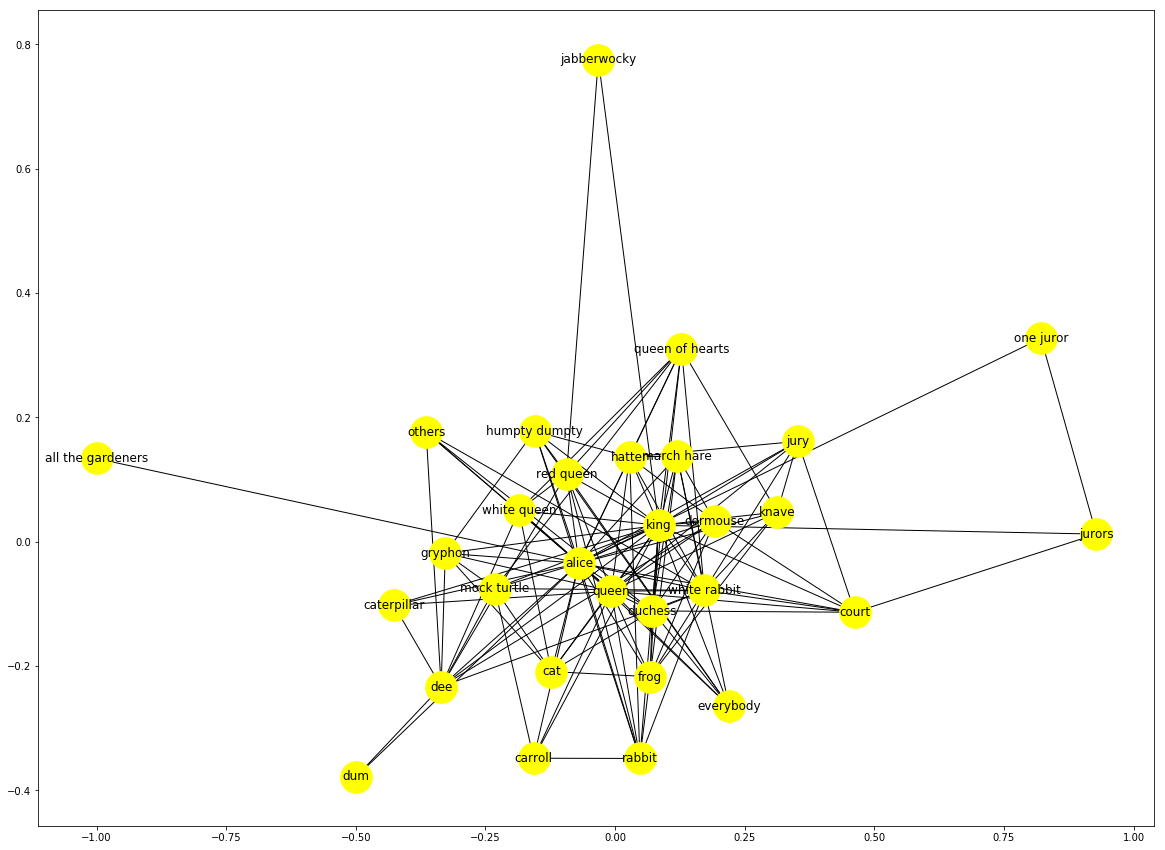

In [102]:
plt.figure(figsize=(20,15))
nx.draw_networkx(G,with_labels=True, node_size=1000,node_color='yellow')

In [84]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['alice',
  'carroll',
  'cat',
  'caterpillar',
  'court',
  'dee',
  'dormouse',
  'duchess',
  'dum',
  'everybody',
  'frog',
  'gryphon',
  'hatter',
  'humpty dumpty',
  'jabberwocky',
  'jury',
  'king',
  'knave',
  'march hare',
  'mock turtle',
  'others',
  'queen',
  'queen of hearts',
  'rabbit',
  'red queen',
  'white queen',
  'white rabbit'],
 ['all the gardeners'],
 ['jurors', 'one juror']]

In [91]:
import community
part = community_louvain.best_partition(G)
print(part)

NameError: name 'community_louvain' is not defined

In [55]:
print(community_louvain.modularity(part, G))

0.17010888674173108


In [56]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 1, 2, 3]
[(0, 1), (0, 0), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]


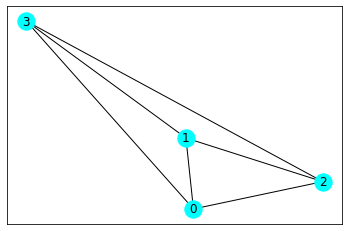

In [57]:
nx.draw_networkx(induced,node_color='cyan')

<h3>Clique Percolation

In [72]:
## Community using Clique percolation 

from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G,6))
print(c)


[frozenset({'king', 'gryphon', 'dee', 'mock turtle', 'alice', 'cat', 'queen'}), frozenset({'cat', 'duchess', 'knave', 'alice', 'white rabbit', 'hatter', 'king', 'frog', 'rabbit', 'dormouse', 'queen', 'court', 'march hare', 'jury'})]


In [73]:
len(c)

2

In [75]:
# nx.draw_networkx(c,node_color='red')


<b>
<ol>
    <li>It can be seen that alice is the most central character  as seen in the book and our centrality analysis further proves it(highest degree/betweeness/closeness/eigenvector )</li>
    <li>It can be seen that dum and dee always appear together but based on the analysis dee takes the major role of talking as dee has more centrality tham dum </li>
    <li>It can be seen from the graphs that the 'all the gardeners' are linked to the actual network just because of alice and the same can be seen from alice's ego network</li>
</ol></b>